在做分类广告投放规划时，需要确定在不同DNU(每日新增用户)下，在不同日期时所能达到的活跃用户量。这种情况下，笔者采取了这种方法进行预估。大家可以一起探讨。

首先建立一些假设：
假定预计新增用户流失规律，符合之前用户不同次留对应的流失曲线。
起始用户不同app年龄层的用户也符合选定的次留流失曲线
流失(留存)曲线在x天后不再发生变化
计算方法
以上假设所依赖的留存率曲线
假设120天后该曲线对应的留存率不再发生变化。拟合曲线公式为：


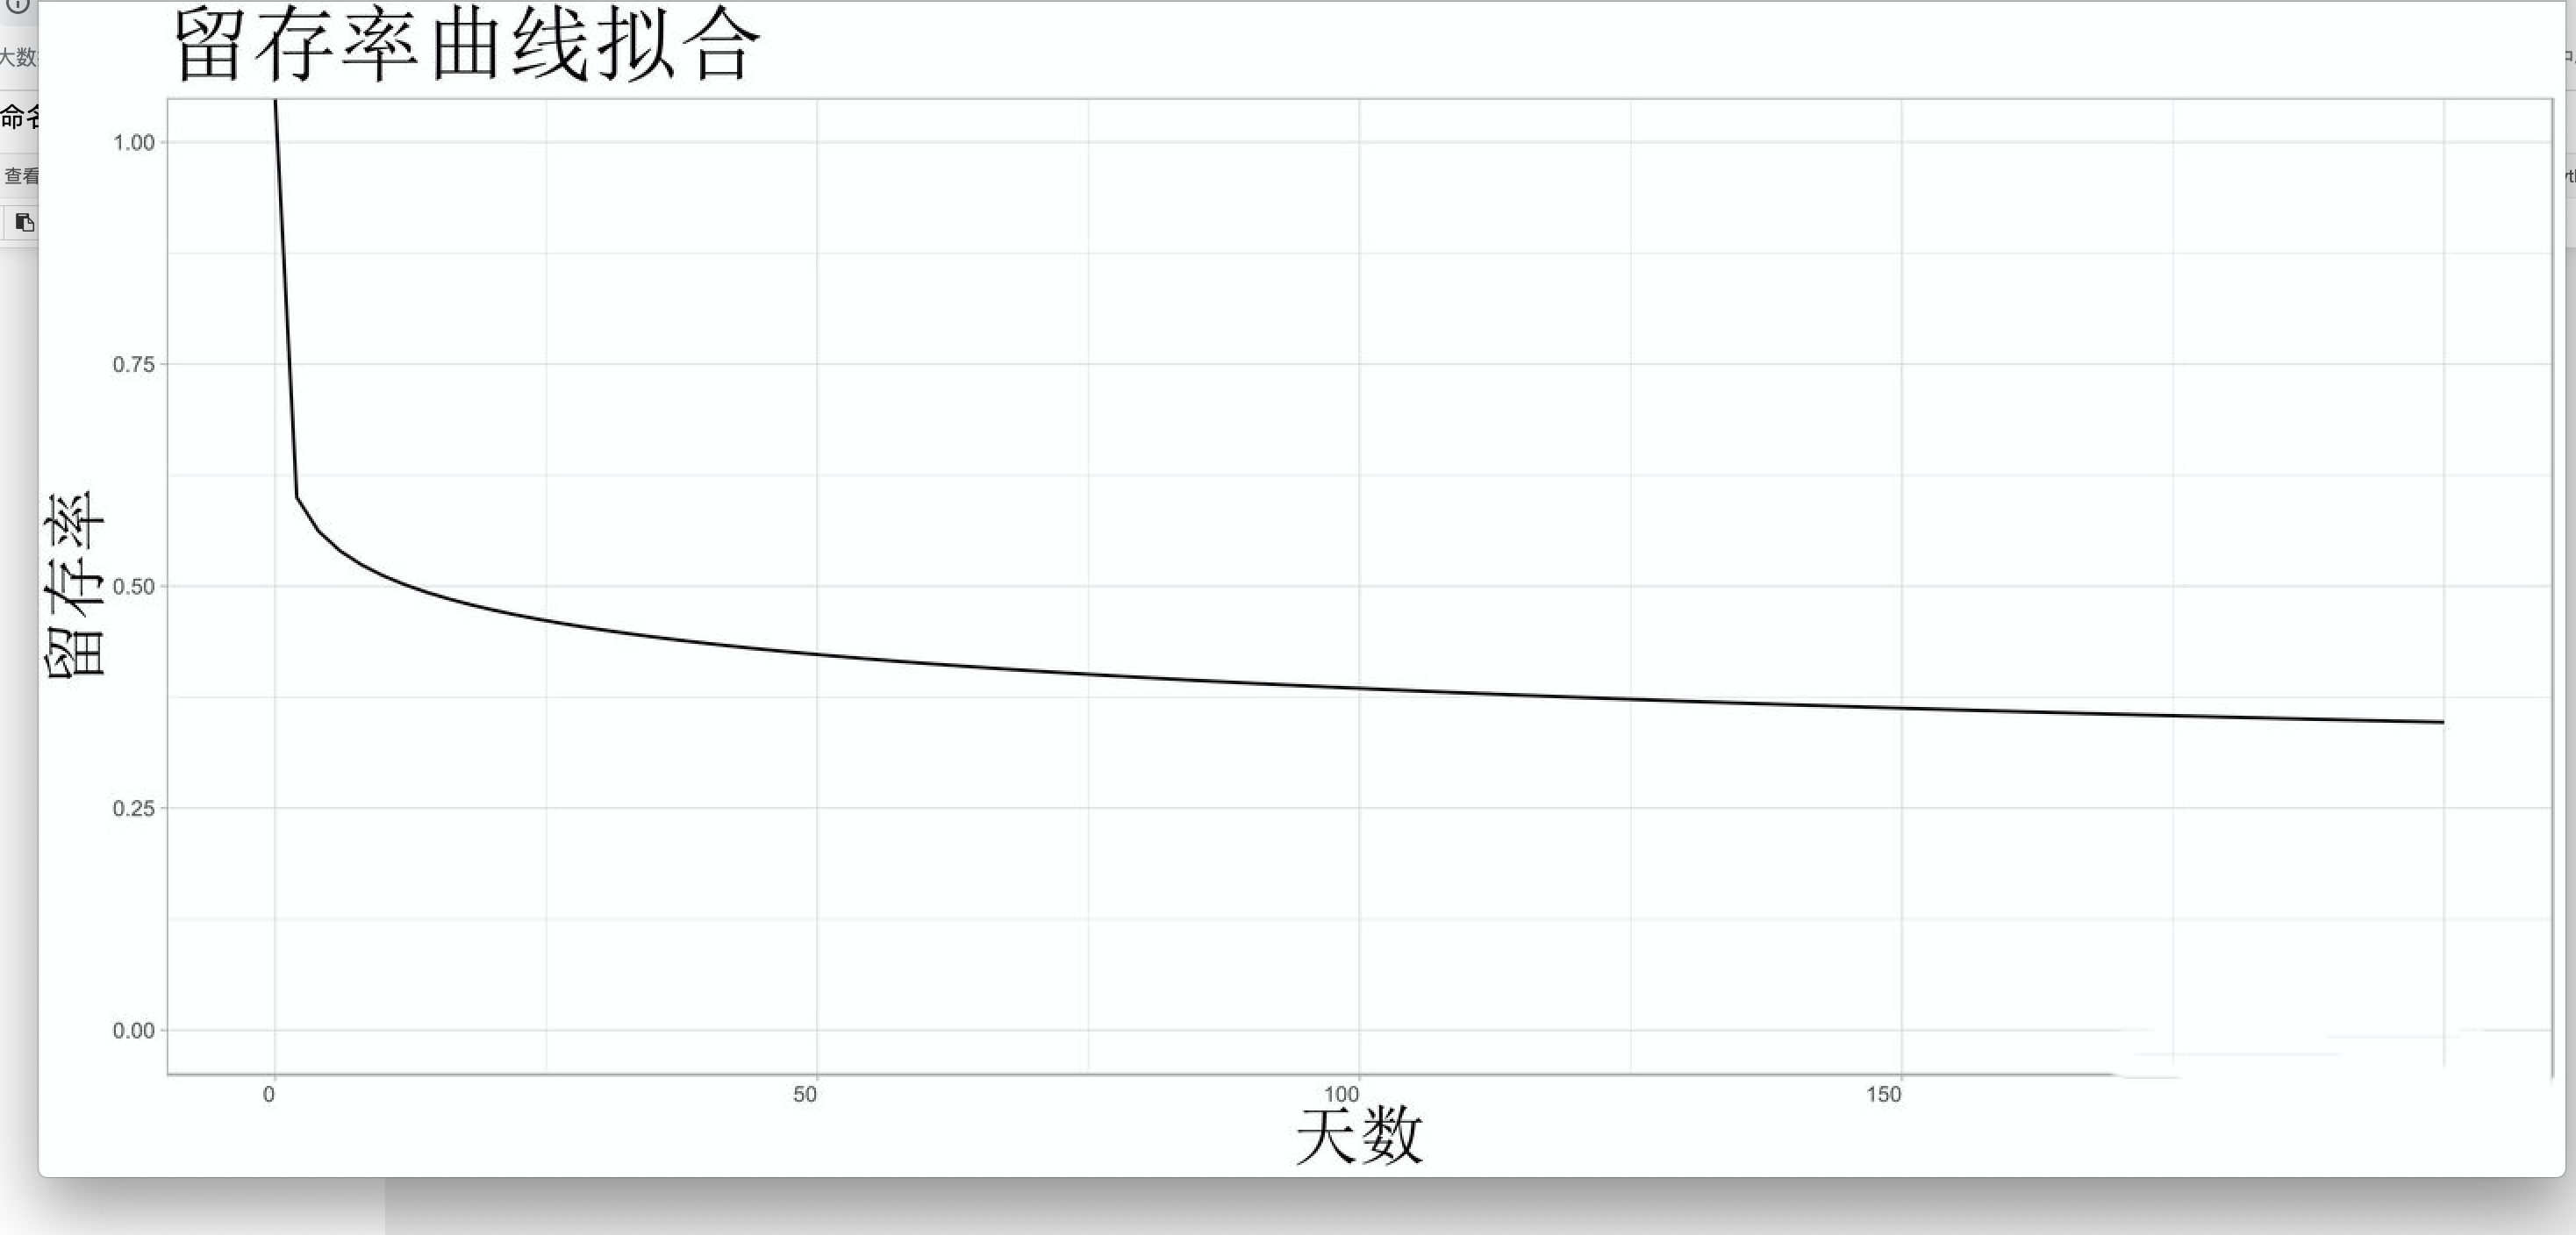


In [11]:
![留存](./ima/留存.jpg)

zsh:1: unknown file attribute: i


起始用户的留存
根据活跃用户的app年龄，结合流失曲线进行预估后汇总得某日后活跃用户的留存量，汇总当日的新增后得当日的活跃用户量。比如1月31日的活跃用户中有100个1月1日注册的用户，根据流失曲线计算这100个用户在注册后第32天的剩余量计入2月1日的活跃用户，依次类推。



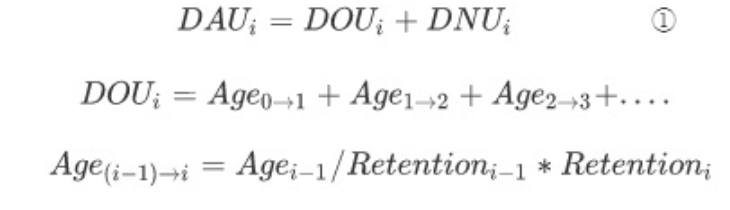

In [10]:
设定场景
2021年12月31日的DAU为7797，活跃用户的app年龄分布见下表。市场推广部门如果在1-6月份，每月每日带来3000左右的用户，那么在2022年7月1日时这款app的活跃用户量是多少？

SyntaxError: invalid character in identifier (1665917402.py, line 2)

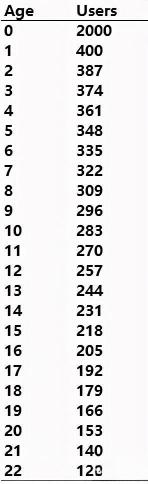

In [6]:
利用公式，我们可以计算一下，2022年1月1日时的活跃用户量计算表格如下

SyntaxError: invalid character in identifier (3244958350.py, line 1)

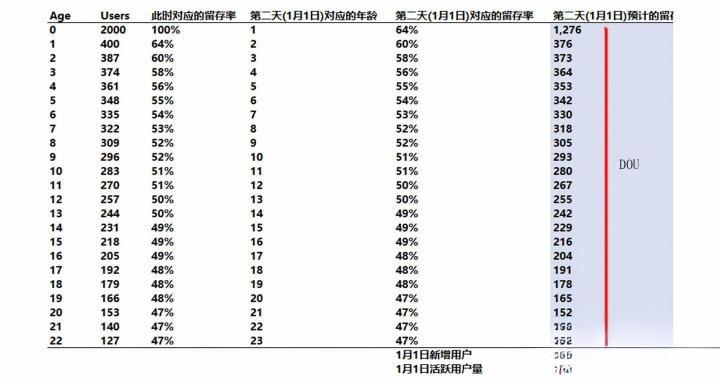


依此类推可以计算第n天时的活跃用户量，计算逻辑如上。以下为计算代码可以供大家参考:

设计函数计算在有起始用户数，留存率及每日预计新增的用户数，选用的留存率曲线对应的次日留存，设置第多少天后留存率不再发生变化.

def cal_days_num(data_start_dict,live_rate_dict,dnu_list,r2_list,n_days,live_rate_limit = 396):
    '''
    输入开始人数字典，对应次留字典，每日新增人数,n_days:要查看的天数
    data_start_dict:起始人数
    live_rate_dict:存储不同次留对应的留存曲线
    dnu_list：存储每天对应的新增
    r2_list:存储每天对应的次留
    n_days：记录要查看的天数
    live_rate_limit:是指第几天后留存不再发生变化，默认为第90天，取值为（90-1）89
    :return: 前n_days天的每日的明细及汇总新增数据。
    '''
    day_live_num = []
    day_dict = {}
    for i in  range(n_days):
        age_num = []
        age_live_num = []
        try:
            num_0 = data_start_dict[0]
        except:
            num_0 = dnu_list[i]
        data_start_dict.update({0:num_0})
        ##one days
        num = dnu_list[i]
        age_num.append(0)
        age_live_num.append(num)
        new_data_start = {}
        for age_value in data_start_dict:
            if age_value >live_rate_limit:
                live_num = data_start_dict[age_value]
                num += live_num
                new_data_start.update({age_value+1:live_num})
            else:
                data_live_dict = live_rate_dict[r2_list[i]]
                live_num = data_start_dict[age_value] / data_live_dict[age_value] * data_live_dict[age_value+1]
                num += live_num
                new_data_start.update({age_value+1:live_num})
            age_num.append(age_value+1)
            age_live_num.append(live_num)
        data_start_dict = new_data_start
        day_dict.update({i:[age_num,age_live_num]})
        day_live_num.append(num)
    return day_dict,day_live_num

In [ ]:
##起始用户年龄
data_start = pd.DataFrame({'days': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22}, 'users': {0: 400, 1: 387, 2: 374, 3: 361, 4: 348, 5: 335, 6: 322, 7: 309, 8: 296, 9: 283, 10: 270, 11: 257, 12: 244, 13: 231, 14: 218, 15: 205, 16: 192, 17: 179, 18: 166, 19: 153, 20: 140, 21: 127}})
##生成起始用户年龄的字典(data_start_dict)
data_start_dict = dict(zip(data_start.days,data_start.users))

##用户使用的留存曲线表:
live_rate = pd.DataFrame(
{'days': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 119: 119, 120: 120}, 'type': {0: 63.82, 1: 63.82, 2: 63.82, 3: 63.82, 4: 63.82, 5: 63.82, 6: 63.82, 7: 63.82, 8: 63.82, 9: 63.82, 10: 63.82, 11: 63.82, 12: 63.82, 13: 63.82, 14: 63.82, 15: 63.82, 16: 63.82, 17: 63.82, 18: 63.82, 19: 63.82, 20: 63.82, 21: 63.82, 22: 63.82, 23: 63.82, 24: 63.82, 25: 63.82, 26: 63.82, 27: 63.82, 28: 63.82, 29: 63.82, 30: 63.82, 31: 63.82, 32: 63.82, 33: 63.82, 34: 63.82, 35: 63.82, 36: 63.82, 37: 63.82, 38: 63.82, 39: 63.82, 40: 63.82, 41: 63.82, 42: 63.82, 43: 63.82, 44: 63.82, 45: 63.82, 46: 63.82, 47: 63.82, 48: 63.82, 49: 63.82, 50: 63.82, 51: 63.82, 52: 63.82, 53: 63.82, 54: 63.82, 55: 63.82, 56: 63.82, 57: 63.82, 58: 63.82, 59: 63.82, 60: 63.82, 61: 63.82, 62: 63.82, 63: 63.82, 64: 63.82, 65: 63.82, 66: 63.82, 67: 63.82, 68: 63.82, 69: 63.82, 70: 63.82, 71: 63.82, 72: 63.82, 73: 63.82, 74: 63.82, 75: 63.82, 76: 63.82, 77: 63.82, 78: 63.82, 79: 63.82, 80: 63.82, 81: 63.82, 82: 63.82, 83: 63.82, 84: 63.82, 85: 63.82, 86: 63.82, 87: 63.82, 88: 63.82, 89: 63.82, 90: 63.82, 91: 63.82, 92: 63.82, 93: 63.82, 94: 63.82, 95: 63.82, 96: 63.82, 97: 63.82, 98: 63.82, 99: 63.82, 100: 63.82, 101: 63.82, 102: 63.82, 103: 63.82, 104: 63.82, 105: 63.82, 106: 63.82, 107: 63.82, 108: 63.82, 109: 63.82, 110: 63.82, 111: 63.82, 112: 63.82, 113: 63.82, 114: 63.82, 115: 63.82, 116: 63.82, 117: 63.82, 118: 63.82, 119: 63.82, 120: 63.82}, 'live_rate': {0: 1.0, 1: 0.6382, 2: 0.600076905069203, 3: 0.577776324123254, 4: 0.5619538101384061, 5: 0.5496809148161245, 6: 0.539653229192457, 7: 0.5311749418019578, 8: 0.523830715207609, 9: 0.517352648246508, 10: 0.5115578198853274, 11: 0.5063157599960896, 12: 0.5015301342616599, 13: 0.49712778533961544, 14: 0.49305184687116077, 15: 0.48925723893937845, 16: 0.485707620276812, 17: 0.4823732660769081, 18: 0.47922955331571093, 19: 0.47625585614584576, 20: 0.4734347249545305, 21: 0.4707512659252117, 22: 0.4681926650652926, 23: 0.46574781812389676, 24: 0.46340703933086297, 25: 0.46116182963224894, 26: 0.45900469040881847, 27: 0.4569289723697619, 28: 0.45492875194036375, 29: 0.4529987293507439, 30: 0.45113414400858143, 31: 0.44933070375331696, 32: 0.447584525346015, 33: 0.44589208411934356, 34: 0.4442501711461111, 35: 0.44265585661808227, 36: 0.4411064583849139, 37: 0.43959951480456766, 38: 0.43813276121504874, 39: 0.4367041094628694, 40: 0.4353116300237335, 41: 0.43395353633126305, 42: 0.43262817099441475, 43: 0.4313339936368541, 44: 0.43006957013449565, 45: 0.42883356306263243, 46: 0.42762472319309974, 47: 0.4264418819059468, 48: 0.425283944400066, 49: 0.42414988360391553, 50: 0.4230387347014519, 51: 0.4219495902001621, 52: 0.4208815954780215, 53: 0.4198339447546333, 54: 0.4188058774389649, 55: 0.41779667481221405, 56: 0.41680565700956673, 57: 0.41583218026909974, 58: 0.4148756344199469, 59: 0.4139354405851854, 60: 0.41301104907778446, 61: 0.41210193747046786, 62: 0.41120760882251994, 63: 0.4103275900484657, 64: 0.4094614304152181, 65: 0.40860870015573997, 66: 0.4077689891885466, 67: 0.4069419059334969, 68: 0.4061270762153141, 69: 0.40532414224715074, 70: 0.40453276168728525, 71: 0.4037526067627276, 72: 0.40298336345411695, 73: 0.4022247307368385, 74: 0.40147641987377064, 75: 0.4007381537555029, 76: 0.4000096662842518, 77: 0.3992907017980474, 78: 0.39858101453207245, 79: 0.3978803681143138, 80: 0.3971885350929365, 81: 0.3965052964930158, 82: 0.3958304414004661, 83: 0.3951637665711871, 84: 0.39450507606361773, 85: 0.3938541808930326, 86: 0.3932108987060571, 87: 0.3925750534739979, 88: 0.39194647520369863, 89: 0.39132499966473233, 90: 0.3907104681318354, 91: 0.39010272714157324, 92: 0.3895016282623027, 93: 0.3889070278765709, 94: 0.38831878697514977, 95: 0.38773677096197023, 96: 0.387160849469269, 97: 0.38659089618231396, 98: 0.3860267886731185, 99: 0.38546840824259754, 100: 0.38491563977065496, 101: 0.3843683715737307, 102: 0.3838264952693651, 103: 0.38328990564737003, 104: 0.3827585005472245, 105: 0.3822321807413362, 106: 0.3817108498238363, 107: 0.38119441410459515, 108: 0.3806827825081679, 109: 0.3801758664773971, 110: 0.3796735798814171, 111: 0.37917583892782164, 112: 0.3786825620787698, 113: 0.37819366997082127, 114: 0.3777090853383027, 115: 0.37722873294002124, 116: 0.37675253948914994, 117: 0.3762804335861234, 118: 0.3758123456543884, 119: 0.37534820787886586, 120: 0.37488795414698745}}
)


##用户使用的留存曲线表(live_rate_dict):
live_rate_groupdata = live_rate.groupby('type')
live_rate_dict = {}
for key,value in live_rate_groupdata:
    day_rate = dict(zip(value.days,value.live_rate))
    live_rate_dict.update({key:day_rate})

##生成每日新增用户数据表
data_dnu = pd.DataFrame(
{'days': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 119: 119, 120: 120, 121: 121, 122: 122, 123: 123, 124: 124, 125: 125, 126: 126, 127: 127, 128: 128, 129: 129, 130: 130, 131: 131, 132: 132, 133: 133, 134: 134, 135: 135, 136: 136, 137: 137, 138: 138, 139: 139, 140: 140, 141: 141, 142: 142, 143: 143, 144: 144, 145: 145, 146: 146, 147: 147, 148: 148, 149: 149, 150: 150, 151: 151, 152: 152, 153: 153, 154: 154, 155: 155, 156: 156, 157: 157, 158: 158, 159: 159, 160: 160, 161: 161, 162: 162, 163: 163, 164: 164, 165: 165, 166: 166, 167: 167, 168: 168, 169: 169, 170: 170, 171: 171, 172: 172, 173: 173, 174: 174, 175: 175, 176: 176, 177: 177, 178: 178, 179: 179, 180: 180}, 'dnu': {0: 3000, 1: 3000, 2: 3000, 3: 3000, 4: 3000, 5: 3000, 6: 3000, 7: 3000, 8: 3000, 9: 3000, 10: 3000, 11: 3000, 12: 3000, 13: 3000, 14: 3000, 15: 3000, 16: 3000, 17: 3000, 18: 3000, 19: 3000, 20: 3000, 21: 3000, 22: 3000, 23: 3000, 24: 3000, 25: 3000, 26: 3000, 27: 3000, 28: 3000, 29: 3000, 30: 3000, 31: 3000, 32: 3000, 33: 3000, 34: 3000, 35: 3000, 36: 3000, 37: 3000, 38: 3000, 39: 3000, 40: 3000, 41: 3000, 42: 3000, 43: 3000, 44: 3000, 45: 3000, 46: 3000, 47: 3000, 48: 3000, 49: 3000, 50: 3000, 51: 3000, 52: 3000, 53: 3000, 54: 3000, 55: 3000, 56: 3000, 57: 3000, 58: 3000, 59: 3000, 60: 3000, 61: 3000, 62: 3000, 63: 3000, 64: 3000, 65: 3000, 66: 3000, 67: 3000, 68: 3000, 69: 3000, 70: 3000, 71: 3000, 72: 3000, 73: 3000, 74: 3000, 75: 3000, 76: 3000, 77: 3000, 78: 3000, 79: 3000, 80: 3000, 81: 3000, 82: 3000, 83: 3000, 84: 3000, 85: 3000, 86: 3000, 87: 3000, 88: 3000, 89: 3000, 90: 3000, 91: 3000, 92: 3000, 93: 3000, 94: 3000, 95: 3000, 96: 3000, 97: 3000, 98: 3000, 99: 3000, 100: 3000, 101: 3000, 102: 3000, 103: 3000, 104: 3000, 105: 3000, 106: 3000, 107: 3000, 108: 3000, 109: 3000, 110: 3000, 111: 3000, 112: 3000, 113: 3000, 114: 3000, 115: 3000, 116: 3000, 117: 3000, 118: 3000, 119: 3000, 120: 3000, 121: 3000, 122: 3000, 123: 3000, 124: 3000, 125: 3000, 126: 3000, 127: 3000, 128: 3000, 129: 3000, 130: 3000, 131: 3000, 132: 3000, 133: 3000, 134: 3000, 135: 3000, 136: 3000, 137: 3000, 138: 3000, 139: 3000, 140: 3000, 141: 3000, 142: 3000, 143: 3000, 144: 3000, 145: 3000, 146: 3000, 147: 3000, 148: 3000, 149: 3000, 150: 3000, 151: 3000, 152: 3000, 153: 3000, 154: 3000, 155: 3000, 156: 3000, 157: 3000, 158: 3000, 159: 3000, 160: 3000, 161: 3000, 162: 3000, 163: 3000, 164: 3000, 165: 3000, 166: 3000, 167: 3000, 168: 3000, 169: 3000, 170: 3000, 171: 3000, 172: 3000, 173: 3000, 174: 3000, 175: 3000, 176: 3000, 177: 3000, 178: 3000, 179: 3000, 180: 3000}, 'r2': {0: 63.82, 1: 63.82, 2: 63.82, 3: 63.82, 4: 63.82, 5: 63.82, 6: 63.82, 7: 63.82, 8: 63.82, 9: 63.82, 10: 63.82, 11: 63.82, 12: 63.82, 13: 63.82, 14: 63.82, 15: 63.82, 16: 63.82, 17: 63.82, 18: 63.82, 19: 63.82, 20: 63.82, 21: 63.82, 22: 63.82, 23: 63.82, 24: 63.82, 25: 63.82, 26: 63.82, 27: 63.82, 28: 63.82, 29: 63.82, 30: 63.82, 31: 63.82, 32: 63.82, 33: 63.82, 34: 63.82, 35: 63.82, 36: 63.82, 37: 63.82, 38: 63.82, 39: 63.82, 40: 63.82, 41: 63.82, 42: 63.82, 43: 63.82, 44: 63.82, 45: 63.82, 46: 63.82, 47: 63.82, 48: 63.82, 49: 63.82, 50: 63.82, 51: 63.82, 52: 63.82, 53: 63.82, 54: 63.82, 55: 63.82, 56: 63.82, 57: 63.82, 58: 63.82, 59: 63.82, 60: 63.82, 61: 63.82, 62: 63.82, 63: 63.82, 64: 63.82, 65: 63.82, 66: 63.82, 67: 63.82, 68: 63.82, 69: 63.82, 70: 63.82, 71: 63.82, 72: 63.82, 73: 63.82, 74: 63.82, 75: 63.82, 76: 63.82, 77: 63.82, 78: 63.82, 79: 63.82, 80: 63.82, 81: 63.82, 82: 63.82, 83: 63.82, 84: 63.82, 85: 63.82, 86: 63.82, 87: 63.82, 88: 63.82, 89: 63.82, 90: 63.82, 91: 63.82, 92: 63.82, 93: 63.82, 94: 63.82, 95: 63.82, 96: 63.82, 97: 63.82, 98: 63.82, 99: 63.82, 100: 63.82, 101: 63.82, 102: 63.82, 103: 63.82, 104: 63.82, 105: 63.82, 106: 63.82, 107: 63.82, 108: 63.82, 109: 63.82, 110: 63.82, 111: 63.82, 112: 63.82, 113: 63.82, 114: 63.82, 115: 63.82, 116: 63.82, 117: 63.82, 118: 63.82, 119: 63.82, 120: 63.82, 121: 63.82, 122: 63.82, 123: 63.82, 124: 63.82, 125: 63.82, 126: 63.82, 127: 63.82, 128: 63.82, 129: 63.82, 130: 63.82, 131: 63.82, 132: 63.82, 133: 63.82, 134: 63.82, 135: 63.82, 136: 63.82, 137: 63.82, 138: 63.82, 139: 63.82, 140: 63.82, 141: 63.82, 142: 63.82, 143: 63.82, 144: 63.82, 145: 63.82, 146: 63.82, 147: 63.82, 148: 63.82, 149: 63.82, 150: 63.82, 151: 63.82, 152: 63.82, 153: 63.82, 154: 63.82, 155: 63.82, 156: 63.82, 157: 63.82, 158: 63.82, 159: 63.82, 160: 63.82, 161: 63.82, 162: 63.82, 163: 63.82, 164: 63.82, 165: 63.82, 166: 63.82, 167: 63.82, 168: 63.82, 169: 63.82, 170: 63.82, 171: 63.82, 172: 63.82, 173: 63.82, 174: 63.82, 175: 63.82, 176: 63.82, 177: 63.82, 178: 63.82, 179: 63.82, 180: 63.82}}
)
###由上述数据生成 dnu_list,及r2_list
dnu_list = data_dnu.dnu.to_list()
r2_list = data_dnu.r2.to_list()
将上述参数代入函数可得两个数据结果,其中day_live_num 即为所预测的每日活跃用户数:
day_dict,day_live_num = cal_days_num(data_start_dict,live_rate_dict,dnu_list,r2_list,n_days=180,live_rate_limit = 119)
dau_df